In [1]:
# Imports
import os
import tensorflow as tf
import math
import matplotlib.pyplot as plt



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

***

# Custom Callback Using Callback Base Class


In TensorFlow, all callbacks are stored in the `tensorflow.keras.callbacks` module. Inside that module, there is a base class called `Callback` which all other callbacks inherit from. You can also subclass the `Callback` base class yourself to create your own callbacks.

The base class `Callback` is constructed with the following methods that will be called at the appropriate time.


***

## 1. Global methods

1. **`on_(train|test|predict)_begin(self, logs=None):`** called at the beginning of `fit()`, `evaluate()`, and `predict()`.

2. **`on_(train|test|predict)_end(self, logs=None):`** called at the end of `fit()`, `evaluate()`, and `predict()`.

## 2. Batch-level method (training, testing, and predicting)
1. **'on_(train|test|predict)_batch_begin(self, batch, logs=None):'** Called right before processing a batch during training/testing/predicting.
2. **`on_(train|test|predict)_batch_end(self, batch, logs=None):`** Called at the end of training/testing/predicting a batch. **Within this method, `logs` is a dict containing the metrics results.**


## 3. Epoch-level method (training only)
1. **`on_epoch_begin(self, epoch, logs=None):`** Called at the beginning of an epoch during training.
2. **`on_epoch_end(self, epoch, logs=None):`** Called at the end of an epoch during training.


## Preparing Dataset 

***

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


## Define the Model

In [3]:
# Define a simple sequential model
def create_model():
  model = Sequential([
    Dense(512, activation='relu', input_shape=(784,), name = 'Layer-1'),
    Dropout(0.2),
    Dense(10, name = "Layer-2")
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer-1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
Layer-2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


***
## Building a custom callback for training
Let’s import the base class `Callback`




In [4]:
from tensorflow.keras.callbacks import Callback

Then, we create a new class `TrainningCallback()` with the methods that will be called at the training time.

In [5]:
class TrainingCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training . . .")

  def on_epoch_begin(self, epoch, logs = None):
    print('Starting Epoch: {}'.format(epoch))

  def on_train_batch_begin(self, batch, logs = None):
    print("Training: Starting batch {}".format(batch))

  def on_train_batch_end(self, batch, logs = None):
    print("Training: Finished batch {}, loss is {}".format(batch, logs['loss']))

  def on_epoch_end(self, epoch, logs = None):
    print("Finished epoch: {}, loss is {}".format(epoch, logs['loss']))

  def on_train_end(self, logs = None):
    print("Finised Training!!!")

Next, to use it for training, we just need to pass `TrainingCallback()` to the callbacks argument in the `model.fit()` method.

In [6]:
history = model.fit(train_images, 
          train_labels,  
          epochs=2,
          verbose = 0,
          validation_data=(test_images, test_labels),
          callbacks = [TrainingCallback()])  # Pass callback to training

Starting training . . .
Starting Epoch: 0
Training: Starting batch 0
Training: Finished batch 0, loss is 2.366914749145508
Training: Starting batch 1
Training: Finished batch 1, loss is 2.209010362625122
Training: Starting batch 2
Training: Finished batch 2, loss is 2.173403263092041
Training: Starting batch 3
Training: Finished batch 3, loss is 2.1502742767333984
Training: Starting batch 4
Training: Finished batch 4, loss is 2.133709192276001
Training: Starting batch 5
Training: Finished batch 5, loss is 2.0544567108154297
Training: Starting batch 6
Training: Finished batch 6, loss is 2.006274700164795
Training: Starting batch 7
Training: Finished batch 7, loss is 1.9358232021331787
Training: Starting batch 8
Training: Finished batch 8, loss is 1.8780674934387207
Training: Starting batch 9
Training: Finished batch 9, loss is 1.8119338750839233
Training: Starting batch 10
Training: Finished batch 10, loss is 1.7621471881866455
Training: Starting batch 11
Training: Finished batch 11, lo

***
## Building a custom callback for testing
Similarly, we can implement a custom callback `TestingCallback()` for testing.

In [7]:
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing ...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
    
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing")

To use it for testing, pass it to the `callbacks` argument in the `model.valutate()` method.

In [8]:
# Checking the test loss and accuracy using the model
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose = 0,
                                     callbacks = [TestingCallback()])

Starting testing ...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Testing: Starting batch 2
Testing: Finished batch 2
Testing: Starting batch 3
Testing: Finished batch 3
Testing: Starting batch 4
Testing: Finished batch 4
Testing: Starting batch 5
Testing: Finished batch 5
Testing: Starting batch 6
Testing: Finished batch 6
Testing: Starting batch 7
Testing: Finished batch 7
Testing: Starting batch 8
Testing: Finished batch 8
Testing: Starting batch 9
Testing: Finished batch 9
Testing: Starting batch 10
Testing: Finished batch 10
Testing: Starting batch 11
Testing: Finished batch 11
Testing: Starting batch 12
Testing: Finished batch 12
Testing: Starting batch 13
Testing: Finished batch 13
Testing: Starting batch 14
Testing: Finished batch 14
Testing: Starting batch 15
Testing: Finished batch 15
Testing: Starting batch 16
Testing: Finished batch 16
Testing: Starting batch 17
Testing: Finished batch 17
Testing: Starting batch 18


***
## Building a custom callback for prediction
Similarly, we can implement a custom callback `PredictionCallback()` for prediction.

In [9]:
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction ...")
    
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finish batch {batch}")
    
    def on_predict_end(self, logs=None):
        print("Finished prediction")

To use it for prediction, we just need to pass it to the `callbacks` argument in the `model.predict()` method.


In [10]:
model.predict(
    test_images, 
    verbose=False, 
    callbacks=[PredictionCallback()], 
    batch_size=2000,  # A large value for demo purpose
)

Starting prediction ...
Prediction: Starting batch 0
Prediction: Finish batch 0
Finished prediction


array([[-2.14687   , -4.1961637 , -0.789013  , ...,  6.7225246 ,
        -1.6199149 ,  2.4877336 ],
       [ 0.957863  , -0.70126903,  3.7387612 , ..., -5.7162232 ,
         1.5490094 , -3.0079787 ],
       [-3.0085604 ,  4.1479034 ,  0.4280536 , ..., -0.13706957,
         0.16395187, -0.695359  ],
       ...,
       [10.425622  , -6.4593935 , -0.35109296, ..., -4.1689744 ,
        -0.24813038, -1.5673692 ],
       [-0.9430056 , -4.8479977 , -2.1385677 , ...,  0.4605515 ,
         1.2622048 ,  4.842414  ],
       [-2.6942565 , -3.652455  , -0.6575959 , ...,  2.2921143 ,
        -0.79630584,  2.9159489 ]], dtype=float32)

***
## Custom Callback Applications

A main application of callback is to perform some actions depend on performance metrics, for example:
- Real-time plotting during training
- Stop training when a metric has stopped improving
- Save model at the end of every epoch
- Adjust learning rate (or other hyperparameters) according to a defined schedule
- etc



***
### Real-time plot during training
This first example shows the creation of a `Callback` that shows a live, real-time update of loss as your training progresses.

In [13]:
import numpy as np
import tensorflow as tf
# fig = plt.figure(figsize=(12,4));
# # Create plot inside the figure
# ax = fig.add_subplot()
# ax.set_xlabel('Epoch #')
# ax.set_ylabel('loss')
class TrainingPlot(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding losses
        self.losses = []
    def on_epoch_begin(self, epoch, logs = None):
        plt.close()
    def on_epoch_end(self, epoch, logs={}):
        # Append the losses to the lists
        self.losses.append(logs['loss'])
        # Plot
        epochs = np.arange(0, len(self.losses))
        #fig = plt.figure(figsize = (4,4))
        plt.plot(epochs, self.losses, "b-")
        plt.show()

`self.losses=[]` is initialized in `on_train_begin()` for holding losses. The real-time plot is implemented at the end of each epoch `on_epoch_end()` by calling `ax.plot(epochs, self.losses, "b-")` and `fig.canvas.draw()` .

To use it for training, we just need to pass it to the `callbacks` argument in the `model.fit()` method.


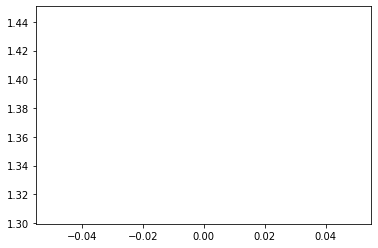

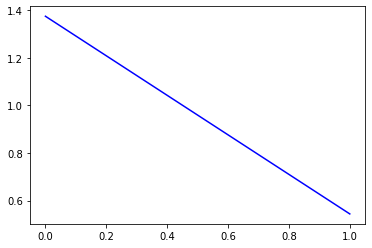

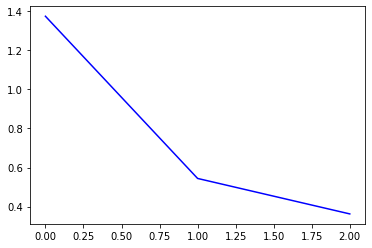

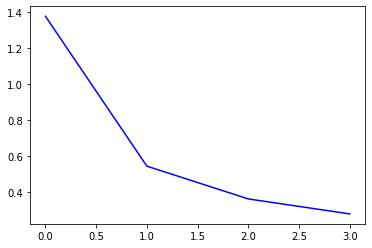

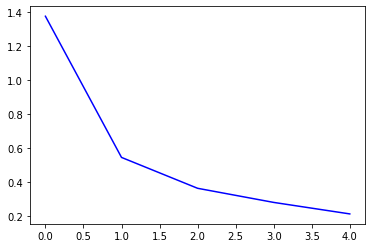

In [14]:
model = create_model()
history = model.fit(
    train_images,
    train_labels, 
    validation_data = (test_images, test_labels),
    epochs=5, 
    batch_size=64, 
    verbose=0,
    callbacks=[TrainingPlot()]
)

# References

1. [A Guide to TensorFlow Callbacks](https://blog.paperspace.com/tensorflow-callbacks/)
2. [Writing your own callbacks](https://www.tensorflow.org/guide/keras/custom_callback)
3. [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)
4. [A Practical Introduction to Keras Callbacks in TensorFlow 2](https://towardsdatascience.com/a-practical-introduction-to-keras-callbacks-in-tensorflow-2-705d0c584966)
5. [How to use TensorFlow callbacks?](https://medium.com/ydata-ai/how-to-use-tensorflow-callbacks-f54f9bb6db25)
6. [Callbacks in Tensor Flow](https://sailajakarra.medium.com/callbacks-in-tensor-flow-f8e7f9996f5f)
7. [Keras Callbacks Explained In Three Minutes](https://www.kdnuggets.com/2019/08/keras-callbacks-explained-three-minutes.html)
8. [Learning Rate Schedule in Practice: an example with Keras and TensorFlow 2.0](https://towardsdatascience.com/learning-rate-schedule-in-practice-an-example-with-keras-and-tensorflow-2-0-2f48b2888a0c)
9. [Building Custom Callbacks with Keras and TensorFlow 2](https://towardsdatascience.com/building-custom-callbacks-with-keras-and-tensorflow-2-85e1b79915a3)
